# House Price Prediction 

## Problem Statement:

To predict the house price in dollors using different features of house which effecting the price of a House.

## Data fields

Data fields

SalePrice : the property's sale price in dollars. This is the target variable that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale.

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
%matplotlib inline
from scipy.stats import skew
from scipy.stats import uniform

from xgboost import XGBRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import make_scorer
# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the Data
dftrain=pd.read_csv("train (1).csv")
dftest=pd.read_csv("test (1).csv")

In [4]:
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
dftest.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
#Combine the dataframe for the preprocessing.
df=dftrain.append(dftest,ignore_index=True)

In [7]:
#Check shape of the dataframes to ensure we combined it correctly.
dftrain.shape,dftest.shape,df.shape

((1460, 81), (1459, 80), (2919, 81))

# EDA

In [8]:
#Summarize quantitative variables using describe()
dftrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


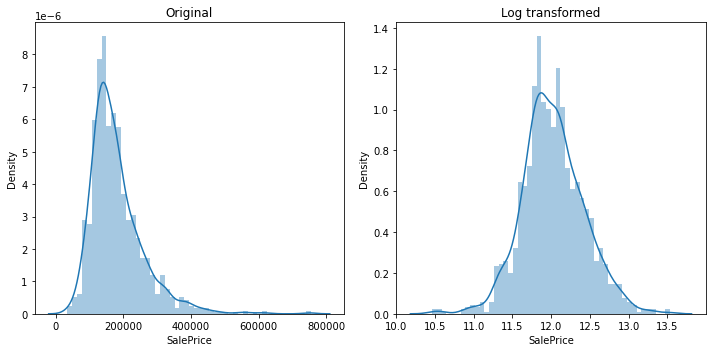

In [9]:
#Plotting the distribution of Saleprice column before and after applying log transformation
#We can see clearly it is in Gaussian distribution after applying log.
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(dftrain.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(np.log1p(dftrain.SalePrice), bins=50)
plt.title('Log transformed')

plt.tight_layout()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

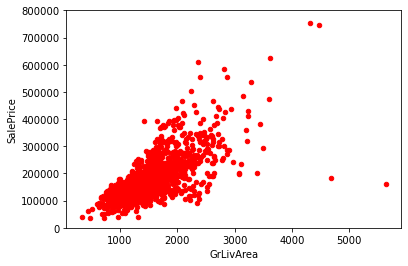

In [10]:
#Plotting relationship between gardernliving area and SalePrice with scatterplot
var = 'GrLivArea'
data = pd.concat([dftrain["SalePrice"], dftrain[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000),color="Red")
#We can see some kind of linear relationship between both variables.

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

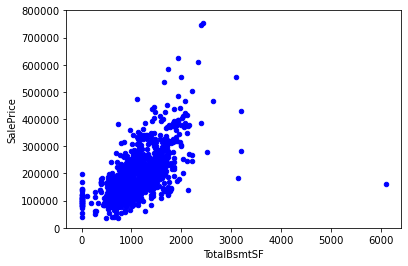

In [11]:
#Plotting relationship between TotalBasement area and SalePrice with scatterplot
var = 'TotalBsmtSF'
data = pd.concat([dftrain["SalePrice"], dftrain[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0,800000),color="blue")

<AxesSubplot:>

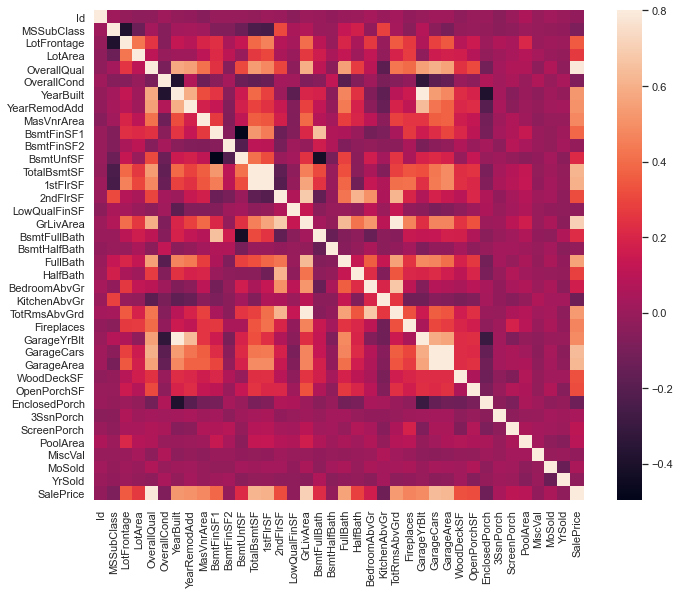

In [12]:
#Plot correlation matrix for train data
corr_matrix=dftrain.corr()
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True)

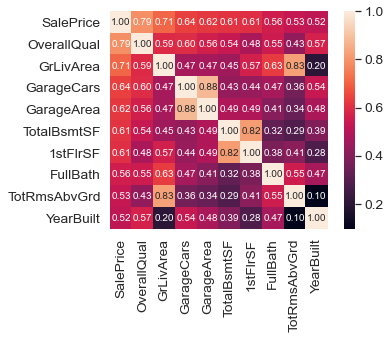

In [13]:
#Looking at heatmap having many features is little confusing so i'am taking top 10 correlated features
#from correlation matrix
import numpy as np
#saleprice correlation matrix
corr_matrix=dftrain.corr()
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(dftrain[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

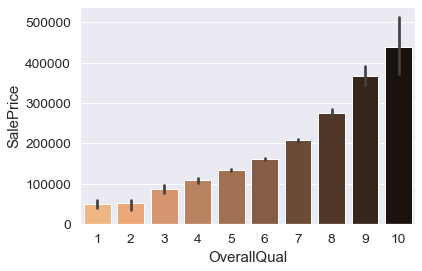

In [14]:
#Barplot showing average SalPrice of different Qualities of House
sns.barplot(x=dftrain.OverallQual,y="SalePrice",data=dftrain,palette='copper_r')
#We can observe that average Saleprice increasing with the increase in quality of huose.

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

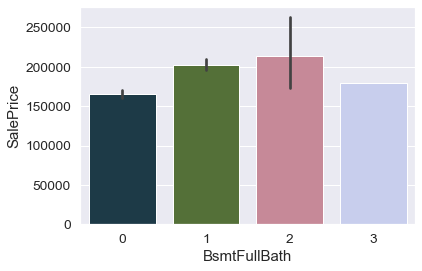

In [15]:
sns.barplot(x=dftrain.BsmtFullBath,y="SalePrice",data=dftrain,palette="cubehelix")

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

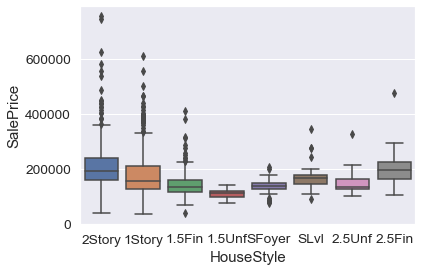

In [16]:
# Plot Boxplot for checking distribution& outiers for different HouseStyles
sns.boxplot(x=dftrain.HouseStyle,y="SalePrice",data=dftrain)

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

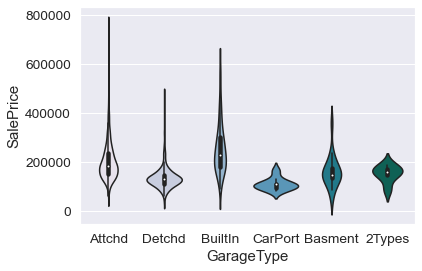

In [17]:
#PLot Violinplot for checking outliers & distribution.
sns.violinplot(x=dftrain.GarageType,y="SalePrice",data=dftrain,palette='PuBuGn')
#Attchd type Garage having more outliers

<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

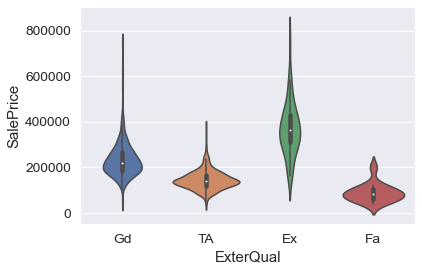

In [18]:
#Plot violinplot to observe distribution. 
sns.violinplot(x=dftrain.ExterQual,y="SalePrice",data=dftrain)

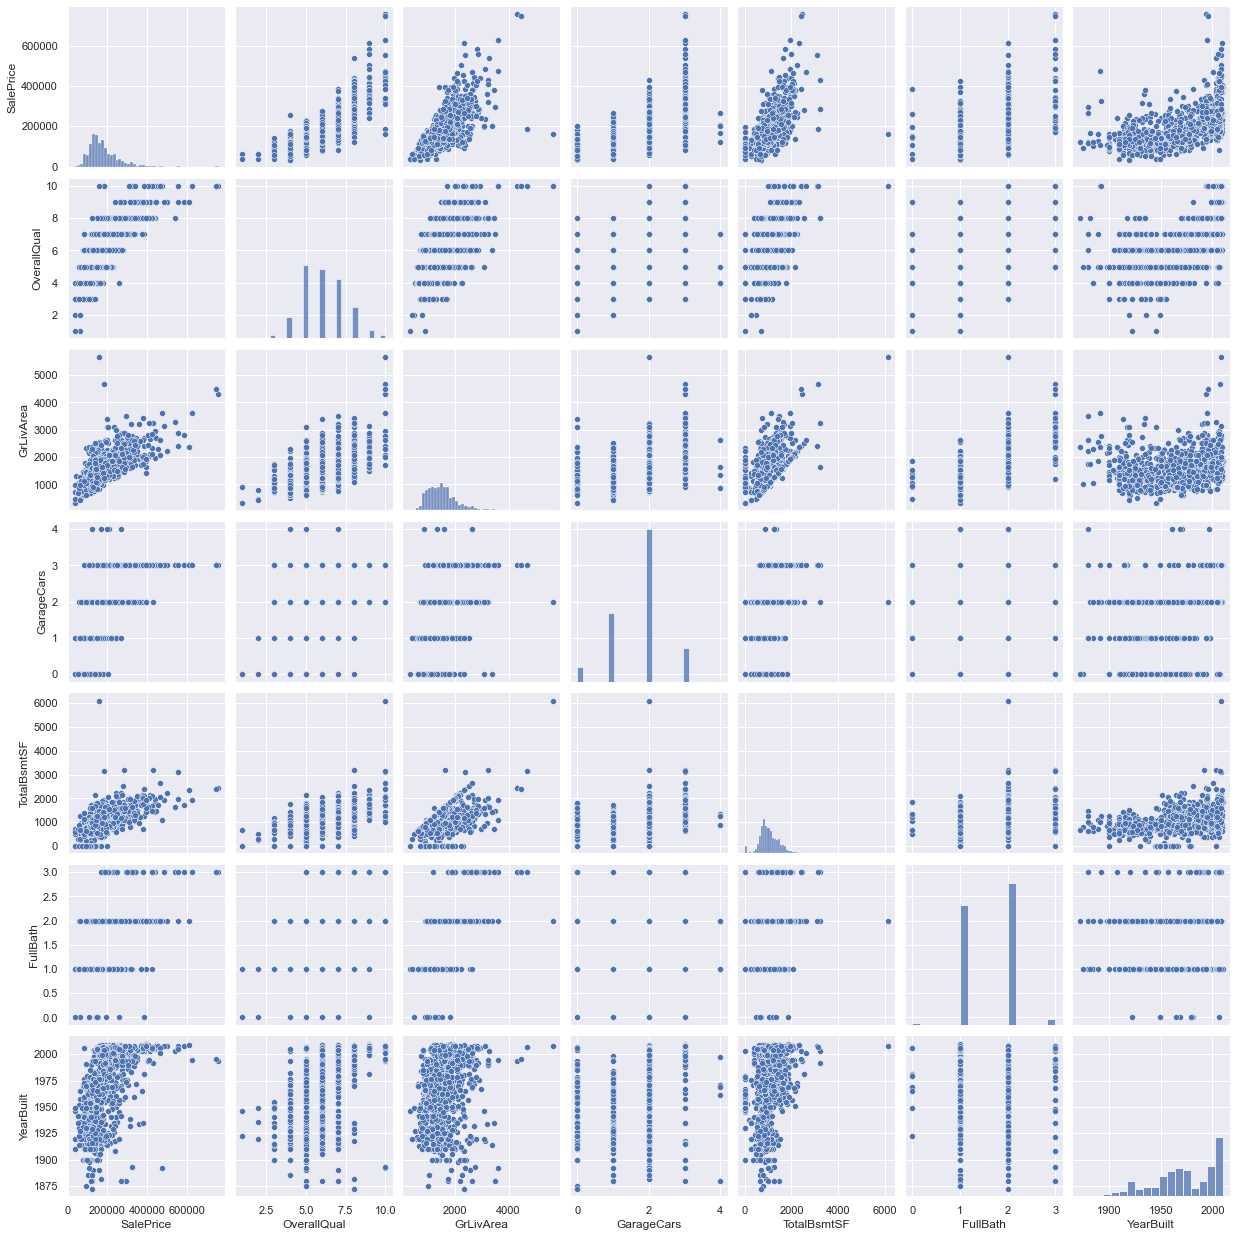

In [19]:
#Plotting pairplot for understanding relationship bwtween some of the correlated features
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dftrain[cols], size = 2.5)
plt.show()

<AxesSubplot:>

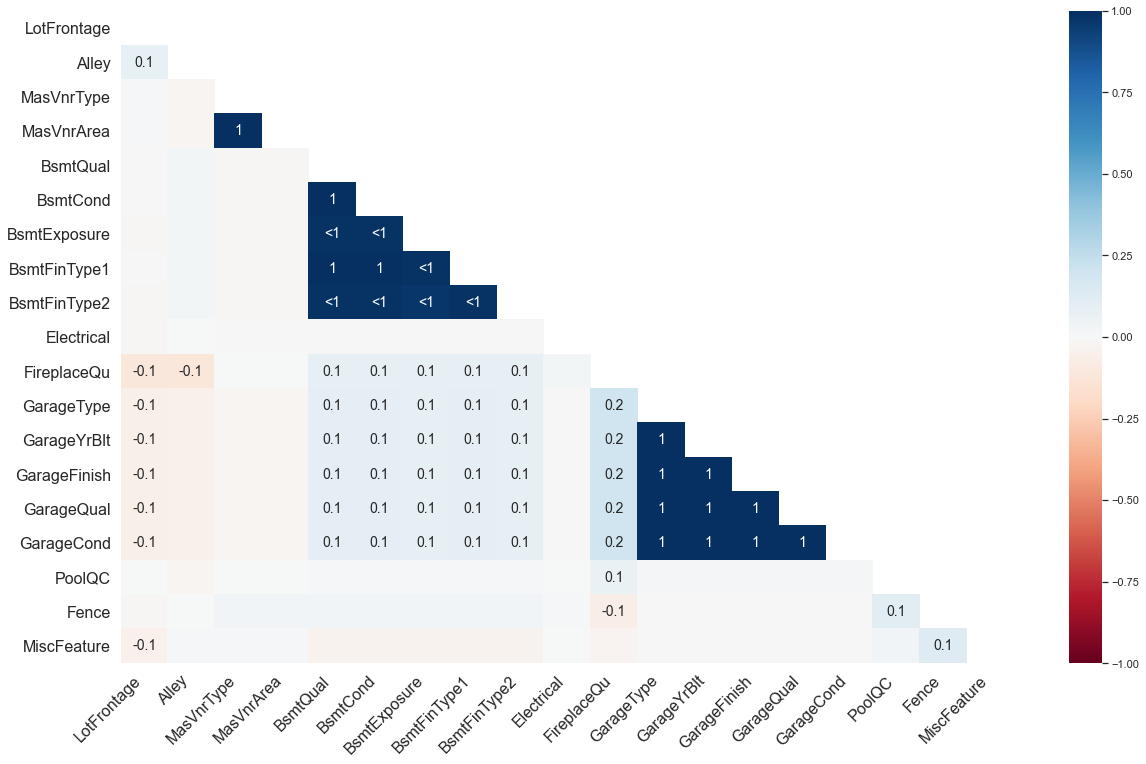

In [20]:
#Plotting corelation between missing valued columns
msn.heatmap(dftrain)
#A value near -1 means if one variable appears then the other variable is very likely to be missing.
#A value near 0 means there is no dependence between the occurrence of missing values of two variables.
#A value near 1 means if one variable appears then the other variable is very likely to be present.

# Pre Processing

## Missing Values Treatment

In [21]:
# Divide the data into numerical ("quancol") and categorical ("catcol") features
quancol = list( dftest.loc[:,dftest.dtypes != 'object'].drop('Id',axis=1).columns.values )
catcol = list( dftest.loc[:,dftest.dtypes == 'object'].columns.values )

In [25]:
#Check for the null/missing values 
df[catcol].isnull().sum().sort_values(ascending=False).head(25)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MSZoning           4
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
KitchenQual        1
Electrical         1
RoofStyle          0
HouseStyle         0
dtype: int64

In [26]:
df[quancol].isnull().sum().sort_values(ascending=False).head(12)

LotFrontage     486
GarageYrBlt     159
MasVnrArea       23
BsmtHalfBath      2
BsmtFullBath      2
TotalBsmtSF       1
GarageCars        1
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
GarageArea        1
OpenPorchSF       0
dtype: int64

In [27]:
# Filling missing values for numerical features. Most of the Null values represent that 
# the corresponding facillity/structure doesn't exist, so I use zero to fill null values in most of the cases.

df.LotFrontage.fillna(df.LotFrontage.median(), inplace=True)

# NAN represents here no garage. I temporarily use yr = 0 .We Will come back to this later. 
df.GarageYrBlt.fillna(0, inplace=True)

# Use zero
df.MasVnrArea.fillna(0, inplace=True)    
df.BsmtHalfBath.fillna(0, inplace=True)
df.BsmtFullBath.fillna(0, inplace=True)
df.GarageArea.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)    
df.TotalBsmtSF.fillna(0, inplace=True)   
df.BsmtUnfSF.fillna(0, inplace=True)     
df.BsmtFinSF2.fillna(0, inplace=True)    
df.BsmtFinSF1.fillna(0, inplace=True)

In [28]:
# Filling missing values for categorical features
df.PoolQC.fillna('NA', inplace=True)
df.MiscFeature.fillna('NA', inplace=True)    
df.Alley.fillna('NA', inplace=True)          
df.Fence.fillna('NA', inplace=True)         
df.FireplaceQu.fillna('NA', inplace=True)    
df.GarageCond.fillna('NA', inplace=True)    
df.GarageQual.fillna('NA', inplace=True)     
df.GarageFinish.fillna('NA', inplace=True)   
df.GarageType.fillna('NA', inplace=True)     
df.BsmtExposure.fillna('NA', inplace=True)     
df.BsmtCond.fillna('NA', inplace=True)        
df.BsmtQual.fillna('NA', inplace=True)        
df.BsmtFinType2.fillna('NA', inplace=True)     
df.BsmtFinType1.fillna('NA', inplace=True)
df.Exterior2nd.fillna('NA', inplace=True)
#For below column null value is already represented as None so iam filling missing values with "None"
df.MasVnrType.fillna('None', inplace=True)   
 

# These are general properties that all houses should have, so NANs probably 
# just mean that the values were not recorded. So i'am using "mode"(the most 
# common value) to fill.
df.Functional.fillna(df.Functional.mode()[0], inplace=True)       
df.Utilities.fillna(df.Utilities.mode()[0], inplace=True)          
df.Exterior1st.fillna(df.Exterior1st.mode()[0], inplace=True)        
df.SaleType.fillna(df.SaleType.mode()[0], inplace=True)                
df.KitchenQual.fillna(df.KitchenQual.mode()[0], inplace=True)        
df.Electrical.fillna(df.Electrical.mode()[0], inplace=True)    

# MSZoning should highly correlate with the location, so I use the mode values of individual 
# Neighborhoods
for i in df.Neighborhood.unique():
    if df.MSZoning[df.Neighborhood == i].isnull().sum() > 0:
        df.loc[df.Neighborhood == i,'MSZoning'] = \
        df.loc[df.Neighborhood == i,'MSZoning'].fillna(df.loc[df.Neighborhood == i,'MSZoning'].mode()[0])

In [29]:
#For reference purpose what i have done in last step of previous block of code
#Filled with modes of different MSZone groups
df["Neighborhood"].groupby(df.MSZoning).agg(lambda x:x.value_counts().index[0]).reset_index()

,MSZoning,Neighborhood
0,C (all),IDOTRR
1,FV,Somerst
2,RH,SWISU
3,RL,NAmes
4,RM,OldTown


## Label Encoding

In [30]:
# These categorical features are in  "rank", so they can be transformed to 
# numerical features
df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})

# Update my lists of numerical and categorical features
newquancol = ['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
           'ExterCond','ExterQual','FireplaceQu','Functional','GarageCond',
           'GarageQual','HeatingQC','KitchenQual','LandSlope','PavedDrive','PoolQC',
           'Street','Utilities']
quancol = quancol + newquancol 
for i in newquancol: catcol.remove(i)

#We already have Yrsold so i'am dropping 'Mosold'.
df=df.drop('MoSold',axis=1)

# Update my lists of numerical and categorical features
quancol.remove('MoSold')
quancol.remove('MSSubClass')
catcol.append('MSSubClass')

## Feature Engineering

In [31]:
#Extracting Useful columns from existing Time variables.
df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

# For the houses without a Garage, I filled the NANs with zeros, which makes AgeGarage ~ 2000
# Here I replace their AgeGarage with the maximum value among the houses with Garages
max_AgeGarage = np.max(df.AgeGarage[df.AgeGarage < 1000])
df['AgeGarage'] = df['AgeGarage'].map(lambda x: max_AgeGarage if x > 1000 else x)

# Some of the values are negative because the work was done after the house 
# was sold. In these cases, I change them to zero to avoid negative ages.
df.Age = df.Age.map(lambda x: 0 if x < 0 else x)
df.AgeRemod = df.AgeRemod.map(lambda x: 0 if x < 0 else x)
df.AgeGarage = df.AgeGarage.map(lambda x: 0 if x < 0 else x)

# drop the original time variables 
df=df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

# update my list of numerical feature
for i in ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']: quancol.remove(i)
quancol = quancol + ['Age','AgeRemod','AgeGarage']

To prevent Dummy Variable trap I'am dropping last column of the dummy columns.

In [32]:
# create dummy variables and drop last column of dummies to avoid dummy variable trap.
df = pd.get_dummies(df,columns=catcol) 

In [42]:
#Separate train and test data from combined dataframe
X_train  = df[:-1459].drop(['SalePrice','Id'], axis=1)
y_train  = df[:-1459]['SalePrice']
X_test  = df[-1459:].drop(['SalePrice','Id'], axis=1)
#Scale the data
scaler = RobustScaler()
X_train[quancol]= scaler.fit_transform(X_train[quancol])
X_test[quancol]= scaler.transform(X_test[quancol])

X_train.shape, X_test.shape # now we have 272 features!

((1460, 246), (1459, 246))

## Feature Selection

In [34]:
#Using Xgbregressior as estimator for model selection
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X_train.columns)
imp = imp.sort_values(['Importance'], ascending = False)
#Print feature_iportances in acending order
print(imp)     

                  Importance
OverallQual         0.290839
CentralAir_N        0.140976
GarageCars          0.059849
KitchenAbvGr        0.040175
GrLivArea           0.034548
...                      ...
RoofMatl_ClyTile    0.000000
Heating_Wall        0.000000
RoofMatl_Membran    0.000000
RoofMatl_Metal      0.000000
MSSubClass_190      0.000000

[246 rows x 1 columns]


<AxesSubplot:>

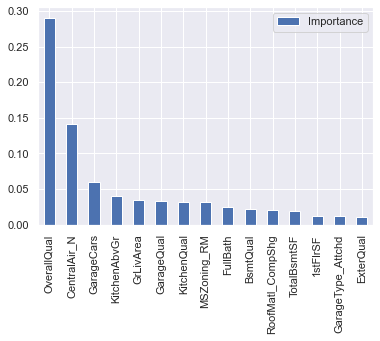

In [35]:
#PLot feature importances with barchart
imp[:15].plot(kind="bar")

In [43]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(xgb, prefit=True)
X_new=model.transform(X_train)

In [50]:
feature_idx = model.get_support()
feature_kept = X_train.columns[feature_idx]

In [56]:
feature_kept

Index(['OverallQual', 'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenAbvGr',
       'KitchenQual', 'FireplaceQu', 'GarageCars', 'GarageQual', 'AgeRemod',
       'MSZoning_C (all)', 'MSZoning_RM', 'LandContour_Bnk', 'LandContour_HLS',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'RoofMatl_CompShg',
       'CentralAir_N', 'GarageType_Attchd', 'Fence_GdPrv', 'SaleType_New',
       'SaleType_WD', 'MSSubClass_75'],
      dtype='object')

In [54]:
X_train=X_train[feature_kept]
X_test=X_test[feature_kept]

In [55]:
X_train.shape,X_test.shape

((1460, 28), (1459, 28))

#### Not Using RFECV method becuse it's taking longtime to run
Using Recursive feature elimination with cross-validation to select the number of features and

Xgbregressor as estimator

Negative mean sqaured error as scoring function.

estimator = XGBRegressor()\
selector = RFECV(estimator, cv = 3, n_jobs = -1, scoring ="neg_mean_squared_error")\
selector = selector.fit(X_train, y_train)\

print("The number of selected features is: {}".format(selector.n_features_))\

features_kept = X_train.columns.values[selector.support_]\ 
X_train = X_train[features_kept]\
X_test = X_test[features_kept]


## Fit Model

### Multiple Linear Regression Model

In [57]:
from sklearn.linear_model import LinearRegression


In [58]:
reg=LinearRegression()

In [59]:
regmodel=reg.fit(X_train,y_train)

In [60]:
regmodel.score(X_train,y_train)

0.8217241013275206

### Multiple Linear Regression with Lasso Regularization

In [61]:
from sklearn.linear_model import Lasso

In [62]:
reg_l1=Lasso()

In [63]:
reg_l1.fit(X_train,y_train)

Lasso()

In [65]:
#There is not much improvement in model because we already done feature selection

In [64]:
reg_l1.score(X_train,y_train)

0.8217238483121329

### Multiple Linear Regression with Ridge Regularization

In [66]:
from sklearn.linear_model import Ridge

In [69]:
reg_l2=Ridge()

In [71]:
reg_l2.fit(X_train,y_train)

Ridge()

In [73]:
#There is not much improvement in model because we already done feature selection

In [72]:
reg_l2.score(X_train,y_train)

0.8217088417585219

### Multiple Linear Regression with Elasticnet

In [74]:
from sklearn.linear_model import ElasticNet

In [75]:
reg_l3=ElasticNet()

In [76]:
reg_l3.fit(X_train,y_train)

ElasticNet()

In [77]:
reg_l3.score(X_train,y_train)

0.7765395219628222

### KNeighborsRegressor

In [85]:
from sklearn.neighbors import KNeighborsRegressor

In [104]:
knr=KNeighborsRegressor(n_neighbors=3)

In [105]:
knr.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [106]:
knr.score(X_train,y_train)

0.9211164654242538

### Decision Tree Regressor

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
tree=DecisionTreeRegressor()

In [109]:
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [111]:
tree.score(X_train,y_train)
#A single Decision Tree always overfits our data so let's check ensemble methods

0.9999912478272681

### Enseble Techniques

### Bagging:

### RandomForestRegressor

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf=RandomForestRegressor()

In [114]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
rf.score(X_train,y_train)

0.982050945158774

### Boosting:

### Adaboost Regressor

In [120]:
from sklearn.ensemble import AdaBoostRegressor

In [121]:
Ab=AdaBoostRegressor()

In [122]:
Ab.fit(X_train,y_train)

AdaBoostRegressor()

In [123]:
Ab.score(X_train,y_train)

0.858910342523665

### Gradient boosting

In [116]:
from sklearn.ensemble import GradientBoostingRegressor

In [117]:
gbm=GradientBoostingRegressor()

In [118]:
gbm.fit(X_train,y_train)

GradientBoostingRegressor()

In [119]:
gbm.score(X_train,y_train)

0.951982467119472

## Xgboost model

In [128]:
#Among all above models Xgboost performing well with both sample & out of sample data
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [151]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 900, alpha = 10, n_estimators = 120)


In [152]:
xgmodel=xg_reg.fit(X_train,y_train)

[19:04:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [131]:
xgmodel.score(X_train,y_train)

0.9999622705099487

## Hyperparameter tuning

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [133]:
# A parameter grid for XGBoost
params = {
        'alpha': [0.5, 1, 1.5, 2,3,5,7,9,10,12,14],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [100,200,300,400,500,600,700,800,900,1000,1100,1200],
        'n_estimators':[30,50,70,80,90,100,120,140,160,180],
        'learning_rate':[0.001,0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6]
        }

In [134]:
folds = 3
param_comb = 100

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xg_reg, param_distributions=params, n_iter=param_comb, scoring='neg_mean_squared_error', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# Here we go

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[19:02:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x000001EC8A372740>,
                   estimator=XGBRegressor(alpha=10, base_score=0.5,
                                          booster='gbtree', colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=0.3, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=900, min_child_weight=1,
                                          missing=nan,
                                          mo...
                   n_iter=100, n_jobs=4,
                   param_distributions={'alpha': [0.5, 1, 1.5, 2, 3, 5, 7, 9,
                                                  10, 12, 14],
                                        'colsam

In [135]:
#Print Random search Results
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBRegressor(alpha=14, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=700,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

 Best hyperparameters:
{'n_estimators': 100, 'max_depth': 700, 'learning_rate': 0.05, 'colsample_bytree': 0.6, 'alpha': 14}


In [136]:
#build model with best parameters obtained from random search
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.6, learning_rate = 0.05,max_depth = 700, alpha = 14, n_estimators = 120)


In [137]:
xgmodel=xg_reg.fit(X_train,y_train)

[19:03:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [138]:
xgmodel.score(X_train,y_train)

0.9991493839309015

In [153]:
predicttrain=xgmodel.predict(X_train)

In [154]:
resid=y_train-predicttrain

In [155]:
predectxg=xgmodel.predict(X_test)

In [156]:
predectxg=pd.DataFrame(predectxg)

In [157]:
predectxg.to_csv("xgboost_final.csv")

# Model Evaluation

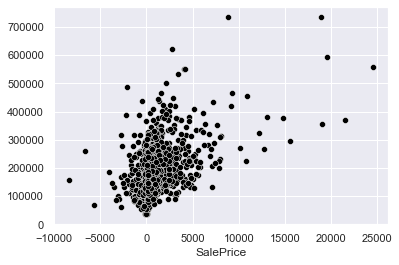

In [146]:
#Residual plot for analysis
sns.scatterplot(resid,predicttrain,color='black');

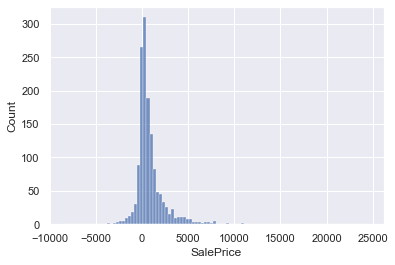

In [148]:
#plot histogram to check distribution of residuals.
sns.histplot(resid,bins=100);

In [149]:
from sklearn import metrics

In [158]:
#Evaluation metrics
print('MAE:', metrics.mean_absolute_error(predicttrain,y_train))
print('MSE:', metrics.mean_squared_error(predicttrain,y_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(predicttrain,y_train)))

MAE: 191.4869194135274
MSE: 237951.91718684157
RMSE: 487.80315413785667
